In [1]:
from gensim.models import KeyedVectors
from random import shuffle
from pprint import pprint
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
model = KeyedVectors.load_word2vec_format("./skipgram/skip_gram_v100m8.w2v.txt", binary=False)

In [12]:
words = [
    "samochód",
    "sąd_wysoki",
    "trybunał_konstytucyjny",
    "kodeks_cywilny",
    "kpk",
    "sąd_rejonowy",
    "szkoda",
    "wypadek",
    "kolizja",
    "szkoda_majątkowa",
    "nieszczęście",
    "rozwód",
]

for word in words:
    tmp = word + "::noun"
    try:
        most_similar = model.most_similar(positive=tmp)
        print(tmp)
        pprint(most_similar)
    except Exception as e:
        print(e)

samochód::noun
[('furgonetka::noun', 0.9138537645339966),
 ('auto::noun', 0.8943804502487183),
 ('dżip::noun', 0.8942515850067139),
 ('półciężarówka::noun', 0.8733475208282471),
 ('wóz::noun', 0.8676477670669556),
 ('ciężarówka::noun', 0.8671821355819702),
 ('taksówka::noun', 0.8389532566070557),
 ('pikap::noun', 0.8332048058509827),
 ('rollsa::noun', 0.8285712003707886),
 ('pojazd::noun', 0.8284980058670044)]
"word 'sąd_wysoki::noun' not in vocabulary"
"word 'trybunał_konstytucyjny::noun' not in vocabulary"
kodeks_cywilny::noun
[('ne#Kodeksu_cywilnego::noun', 0.9549584984779358),
 ('ne#Kodeks_Cywilny::noun', 0.8858152627944946),
 ('ne#Kodeksie_cywilnym::noun', 0.860245943069458),
 ('ne#Kodeksie_Cywilnym::noun', 0.8507590889930725),
 ('ne#kodeksu_cywilnego::noun', 0.8474100828170776),
 ('kodeks_handlowy::noun', 0.8371901512145996),
 ('kodeks_pracy::noun', 0.837181806564331),
 ('ne#Kodeksu_Cywilnego::noun', 0.8325188159942627),
 ('ne#Kodeksu_postępowania_cywilnego::noun', 0.818487882614

In [13]:
def create_token(word):
    return word.replace(' ', '_') + '::noun'

In [19]:
equations =[
    (["sąd wysoki", "konstytucja"],["kpc"]),
    (["pasażer", "kobieta"], ["mężczyzna"]),
    (["samochód", "rzeka"], ["droga"])
]
for equation in equations:
    pos_tokens = [create_token(x) for x in equation[0]]
    neg_tokens = [create_token(x) for x in equation[1]]
    print(equation)
    try:
        result = model.most_similar(positive=pos_tokens, negative=neg_tokens)
        pprint(result)
        print('')
    except Exception as e:
        print(e)

(['sąd wysoki', 'konstytucja'], ['kpc'])
"word 'sąd_wysoki::noun' not in vocabulary"
(['pasażer', 'kobieta'], ['mężczyzna'])
[('podróżny::noun', 0.8415741920471191),
 ('współpasażer::noun', 0.7920055985450745),
 ('podróżujący::noun', 0.7550978660583496),
 ('kierowca::noun', 0.7446858286857605),
 ('bagażowy::noun', 0.7316379547119141),
 ('turysta::noun', 0.7310490608215332),
 ('podróżny::adj', 0.7293796539306641),
 ('stewardesa::noun', 0.7254441380500793),
 ('pasażerski::adj', 0.7142226696014404),
 ('autobus::noun', 0.7049777507781982)]

(['samochód', 'rzeka'], ['droga'])
[('motorówka::noun', 0.7439929842948914),
 ('jezioro::noun', 0.7345262765884399),
 ('Łódź::noun', 0.7254728078842163),
 ('ne#Helensburgha::noun', 0.7246426343917847),
 ('ne#East_River::noun', 0.7199318408966064),
 ('ne#Hudsonu::noun', 0.7093889713287354),
 ('ne#Viroma::noun', 0.7086551189422607),
 ('łódka::noun', 0.7058143615722656),
 ('dżip::noun', 0.7049763798713684),
 ('ne#Potomac::noun', 0.7036005258560181)]



In [48]:

words = [
    "szkoda",
    "strata",
    "uszczerbek",
    "szkoda majątkowa",
    "niesprawiedliwość",
    "nieszczęście",
]
tokens = []
for word in words:
    token = create_token(word)
    try:
        result = model.get_vector(token)
        tokens.append(result)
    except Exception as e:
        print(e)
chosen_vectors = np.array(tokens)
print(chosen_vectors.shape)

(6, 100)


In [43]:
vocab=list(model.vocab)

In [44]:
shuffle(vocab)
random_sample = vocab[:1000]
random_vectors = np.array([model.get_vector(x) for x in random_sample])

In [55]:
X = np.concatenate((chosen_vectors, random_vectors), axis=0)
print(X.shape)

(1006, 100)


In [50]:
result = TSNE().fit_transform(X)

In [62]:
 c = np.concatenate([
        np.zeros(10),
        np.ones(6)
    ])
print(c)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


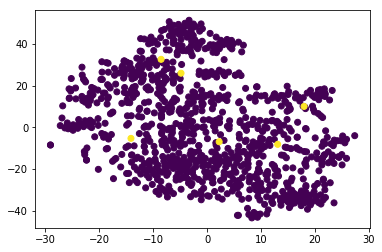

In [66]:
plt.scatter(result[:, 0], result[:, 1], c=np.array([0 if x < 1000 else 1 for x in range(len(result))]))
plt.show()